In [1]:
# In this assignment, students will be using the K-nearest neighbors algorithm to predict how many points NBA players scored in
# the 2013-2014 season.

# A look at the data: 
#     Before we dive into the algorithm, let’s take a look at our data. Each row in the data contains information on how a 
#     player performed in the 2013-2014 NBA season.
    
# Download 'nba_2013.csv' file from this link: 
#     https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0
        
#     Here are some selected columns from the data:
#     player - name of the player
#     pos - the position of the player
#     g - number of games the player was in
#     gs - number of games the player started
#     pts - total points the player scored
#     There are many more columns in the data, mostly containing information about average player game performance over the 
#     course of the season. See this site for an explanation of the rest of them.
    
# We can read our dataset in and figure out which columns are present:
#     import pandas
#     with open("nba_2013.csv", 'r') as csvfile:
#     nba = pandas.read_csv(csvfile)

# Load libraries

In [2]:
# Core Libraries - Data manipulation and analysis
import pandas as pd
import numpy as np
import math
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
  
import sklearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import  train_test_split, cross_val_score, KFold 

from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

import pickle

In [3]:
pd.set_option("display.max_columns",100) 

## Load Data

In [4]:
nba_df = pd.read_csv('nba_2013.csv')

**Go through  Dataset and Data**

In [5]:
nba_df.shape

(481, 31)

In [6]:
columns = nba_df.columns.values
columns

array(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg',
       'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.',
       'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk',
       'tov', 'pf', 'pts', 'season', 'season_end'], dtype=object)

In [7]:
nba_df.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013


In [8]:
nba_df.tail()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
476,Tony Wroten,SG,20,PHI,72,16,1765,345,808,0.427,40,188,0.212766,305,620,0.491935,0.452,209,326,0.641,69,159,228,217,78,16,204,151,939,2013-2014,2013
477,Nick Young,SG,28,LAL,64,9,1810,387,889,0.435,135,350,0.385714,252,539,0.467532,0.511,235,285,0.825,29,137,166,95,46,12,95,156,1144,2013-2014,2013
478,Thaddeus Young,PF,25,PHI,79,78,2718,582,1283,0.454,90,292,0.308219,492,991,0.496468,0.489,163,229,0.712,166,310,476,182,167,36,165,213,1417,2013-2014,2013
479,Cody Zeller,C,21,CHA,82,3,1416,172,404,0.426,0,1,0.000000,172,403,0.426799,0.426,146,200,0.730,118,235,353,92,40,41,87,170,490,2013-2014,2013
480,Tyler Zeller,C,24,CLE,70,9,1049,156,290,0.538,0,1,0.000000,156,289,0.539792,0.538,87,121,0.719,103,179,282,36,18,38,60,137,399,2013-2014,2013


In [9]:
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

***There are NULL values in the dataset which need to be imputed or removed. Also, there are NULL values in numerical columns but none in the categorical columns***

In [10]:
nba_df.get_dtype_counts()

float64     5
int64      22
object      4
dtype: int64

** Data Cleaninig**

In [11]:
# Extrat the numerical and categorical columns list
num_cols = nba_df.select_dtypes(exclude = 'object').columns.values
cat_cols = nba_df.select_dtypes(include = 'object').columns.values
num_cols, cat_cols

(array(['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.',
        'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb',
        'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'season_end'],
       dtype=object),
 array(['player', 'pos', 'bref_team_id', 'season'], dtype=object))

## Clean Numerical Columns

In [12]:
nba_df[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 27 columns):
age           481 non-null int64
g             481 non-null int64
gs            481 non-null int64
mp            481 non-null int64
fg            481 non-null int64
fga           481 non-null int64
fg.           479 non-null float64
x3p           481 non-null int64
x3pa          481 non-null int64
x3p.          414 non-null float64
x2p           481 non-null int64
x2pa          481 non-null int64
x2p.          478 non-null float64
efg.          479 non-null float64
ft            481 non-null int64
fta           481 non-null int64
ft.           461 non-null float64
orb           481 non-null int64
drb           481 non-null int64
trb           481 non-null int64
ast           481 non-null int64
stl           481 non-null int64
blk           481 non-null int64
tov           481 non-null int64
pf            481 non-null int64
pts           481 non-null int64
season_end    481 non-null 

***looking at the information columns 'fg.', 'x3p.', 'x2p.', 'efg.', 'ft.' has null values***

In [13]:
nba_df[num_cols].nunique()

age            21
g              82
gs             80
mp            433
fg            296
fga           372
fg.           212
x3p           134
x3pa          221
x3p.          272
x2p           274
x2pa          339
x2p.          408
efg.          202
ft            203
fta           231
ft.           244
orb           155
drb           267
trb           302
ast           230
stl           120
blk            90
tov           180
pf            204
pts           379
season_end      1
dtype: int64

***There is only one unique values in the dataset for season_end column.  So, being a constant value we can ignore the column in our regression.*** 

** Check the Null values**

In [14]:
nba_null_values = pd.DataFrame({'total_null_values': nba_df[num_cols].isna().sum(), 'null_percentage': (nba_df[num_cols].isna().sum()/nba_df.shape[0])*100})
nba_null_values 

,null_percentage,total_null_values
age,0.000000,0
g,0.000000,0
gs,0.000000,0
mp,0.000000,0
fg,0.000000,0
fga,0.000000,0
fg.,0.415800,2
x3p,0.000000,0
x3pa,0.000000,0
x3p.,13.929314,67


***Since one of the rows has higher percentage of NaN/Null values and also because this is a small dataset, it is better to impute.***

In [15]:
nba_df.loc[(nba_df.isna()).any(axis=1),:].head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013
5,Cole Aldrich,C,25,NYK,46,2,330,33,61,0.541,0,0,NaN,33,61,0.540984,0.541,26,30,0.867,37,92,129,14,8,30,18,40,92,2013-2014,2013
11,Louis Amundson,PF,31,TOT,19,0,185,16,32,0.500,0,0,NaN,16,32,0.500000,0.500,6,24,0.250,28,27,55,6,9,11,14,49,38,2013-2014,2013
18,Joel Anthony,C,31,TOT,33,0,186,12,32,0.375,0,0,NaN,12,32,0.375000,0.375,4,8,0.500,15,23,38,2,3,12,3,17,28,2013-2014,2013


In [16]:
nba_df.interpolate(value=np.NaN, method='nearest', axis=0, inplace=True)


In [17]:
nba_df.loc[(nba_df.isna()).any(axis=1),:].shape

(0, 31)

### 0s

In [18]:
nba_df.loc[(nba_df==0).all(axis=1),:].shape

(0, 31)

***No rows with all columns values == 0***

In [19]:
nba_df.loc[(nba_df==0).any(axis=1),:].shape

(222, 31)

In [20]:
nba_df.loc[(nba_df==0).any(axis=1),:].head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,0.266667,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,0.426667,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013
5,Cole Aldrich,C,25,NYK,46,2,330,33,61,0.541,0,0,0.000000,33,61,0.540984,0.541,26,30,0.867,37,92,129,14,8,30,18,40,92,2013-2014,2013


***The zeroes in the dataset seem to be valid zeros. So, no cleaning is required***

## Clean Categorical Columns

In [21]:
nba_df[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 4 columns):
player          481 non-null object
pos             481 non-null object
bref_team_id    481 non-null object
season          481 non-null object
dtypes: object(4)
memory usage: 15.1+ KB


***There are no null values in the categorical columns***

In [22]:
nba_df['player'].nunique()

481

In [23]:
nba_df['bref_team_id'].unique()

array(['TOT', 'OKC', 'ORL', 'NOP', 'NYK', 'POR', 'MIA', 'MEM', 'BRK',
       'PHI', 'MIL', 'ATL', 'WAS', 'GSW', 'DEN', 'HOU', 'SAS', 'BOS',
       'PHO', 'MIN', 'LAC', 'CLE', 'UTA', 'DET', 'CHA', 'DAL', 'CHI',
       'LAL', 'IND', 'TOR', 'SAC'], dtype=object)

In [24]:
nba_df['bref_team_id'].nunique()

31

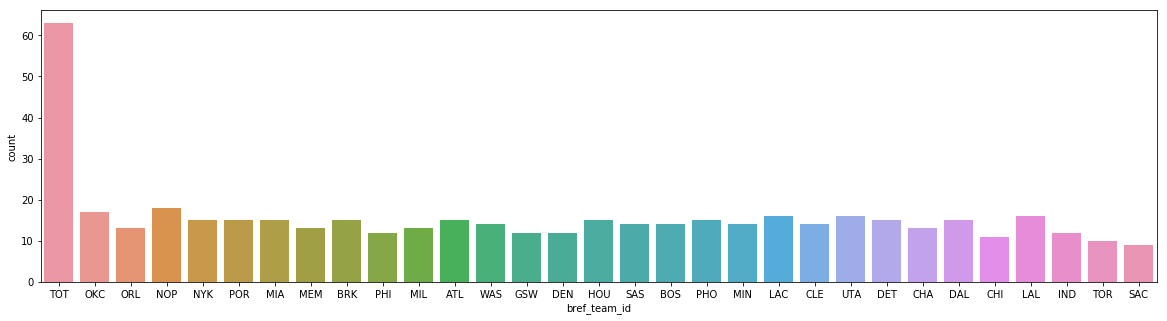

In [25]:
plt.figure(figsize = (20,5))
sns.countplot(x = nba_df['bref_team_id'], data = nba_df)

***It is observed that there many players from the Team with Team ID == TOT. This might introduce a bias in training of the regression. Therefore, it needs checking. TOT is used when a player has represented more than one team in a season.And the values associated with that player's row are the combined stats(Refered: http://stats.nba.com/teams/ and https://www.reddit.com/r/nba/comments/7lt7qz/what_does_tot_mean_on_basketballreferencecom/)***



***The value TOT is a valid value in this dataset***

In [26]:
nba_df['pos'].unique()

array(['SF', 'C', 'PF', 'SG', 'PG', 'G', 'F'], dtype=object)

In [27]:
nba_df['pos'].nunique()

7

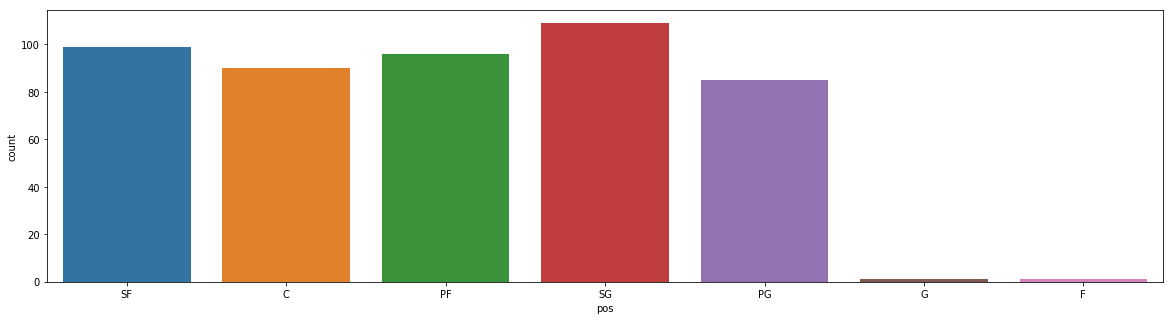

In [28]:
plt.figure(figsize = (20,5))
sns.countplot(x= nba_df['pos'], data = nba_df)

***There are very less number of players having positions == G, F. After reading about the player positions in basketball from https://www.myactivesg.com/sports/basketball/how-to-play/basketball-rules/basketball-positions-and-roles, I have identified that the G,F are invalid values ***

In [29]:
# Identify the players for whom these invalid values G and F
nba_df.loc[(nba_df['pos'].isin(['G','F'])),['player','pos']]

,player,pos
224,Damion James,G
356,Josh Powell,F


In [30]:
# Replace the invalid values with the ones mentioned above
nba_df['pos'].replace(to_replace ='G',value= 'SG',inplace=True)
nba_df['pos'].replace(to_replace ='F',value= 'PF',inplace=True)

In [31]:
# Check the players for whom these invalid values G and F
nba_df.loc[(nba_df['pos'].isin(['G','F'])),['player','pos']]

,player,pos


In [32]:
# Identify the players for whom these invalid values G and F
nba_df.loc[[224,356],['player','pos']]

,player,pos
224,Damion James,SG
356,Josh Powell,PF


***The replacement of the values was successful and the column is now clean***

# Getting Basic Statistical Information

In [34]:
#nba_df.describe()
print(nba_df.describe())

              age           g          gs           mp          fg  \
count  481.000000  481.000000  481.000000   481.000000  481.000000   
mean    26.509356   53.253638   25.571726  1237.386694  192.881497   
std      4.198265   25.322711   29.658465   897.258840  171.832793   
min     19.000000    1.000000    0.000000     1.000000    0.000000   
25%     23.000000   32.000000    0.000000   388.000000   47.000000   
50%     26.000000   61.000000   10.000000  1141.000000  146.000000   
75%     29.000000   76.000000   54.000000  2016.000000  307.000000   
max     39.000000   83.000000   82.000000  3122.000000  849.000000   

               fga         fg.         x3p        x3pa        x3p.  \
count   481.000000  481.000000  481.000000  481.000000  481.000000   
mean    424.463617    0.436268   39.613306  110.130977    0.288133   
std     368.850833    0.098509   50.855639  132.751732    0.157492   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%     110.000000 

# Explore Data

## Uni-variate

### Uni-variate - Numerical columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A73119E668>,
      dtype=object)

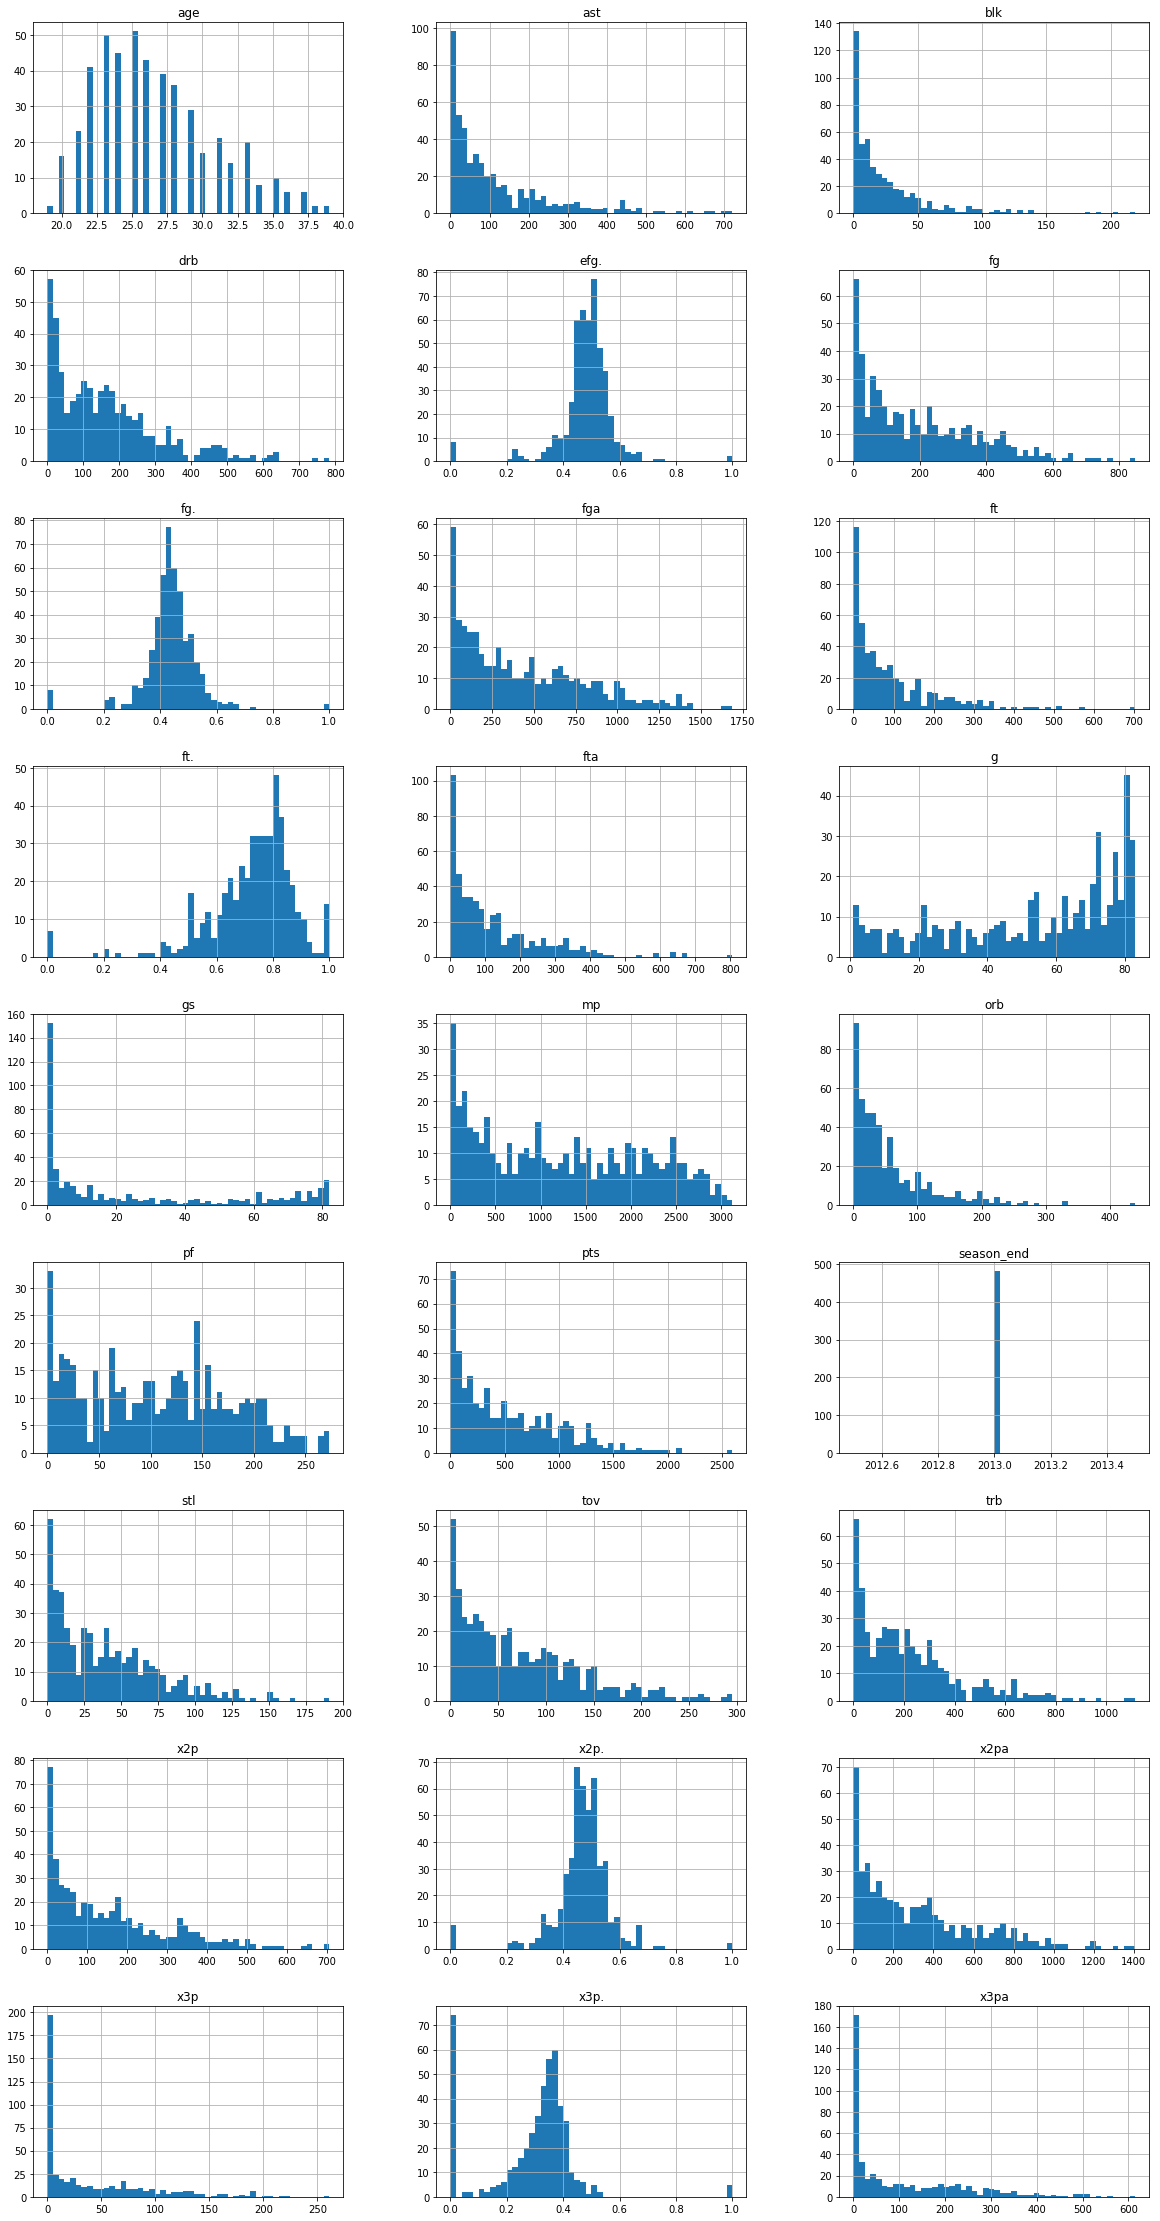

In [35]:
nba_df[num_cols].hist(bins=50,figsize=(20,40), layout= (9,3))

***It is interesting the note the majority of the columns have values which behave similar to exponential distribution***

***Also, the season_end columns has only one value repeated for every row***

## Multi-variate

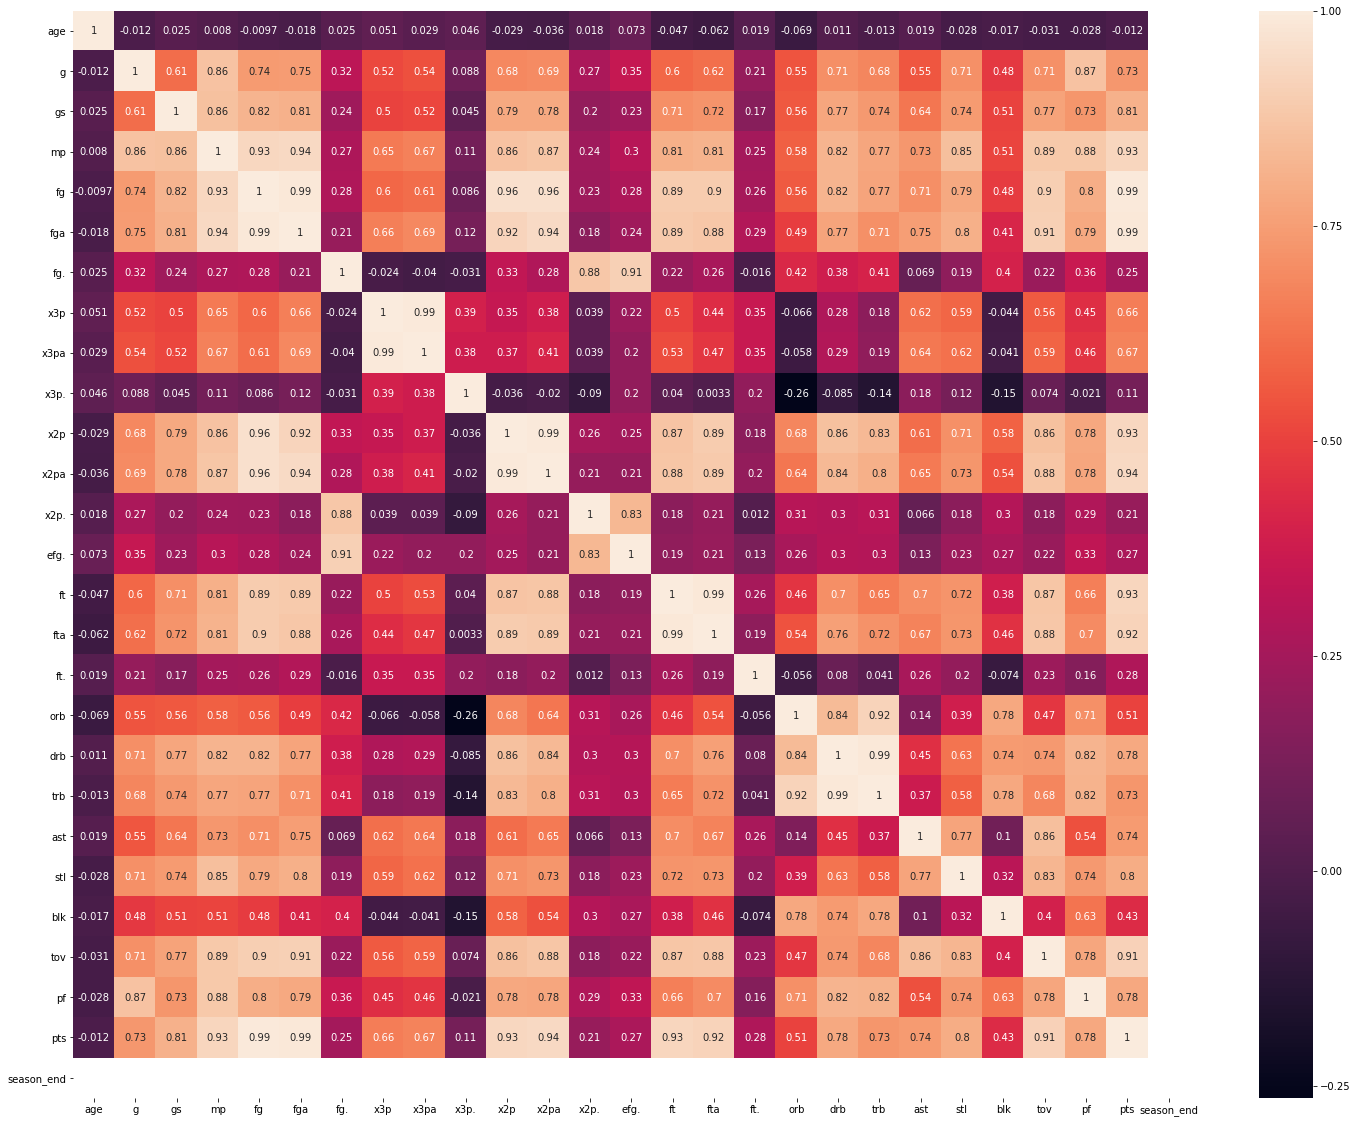

In [36]:
plt.figure(figsize=(25,20))
sns.heatmap(nba_df.corr(), annot = True)

In [37]:
print(nba_df.corr().iloc[-2:-1,:])

         age         g        gs        mp        fg       fga       fg.  \
pts -0.01191  0.728462  0.810294  0.927464  0.992041  0.989211  0.249419   

          x3p      x3pa      x3p.       x2p      x2pa      x2p.      efg.  \
pts  0.655342  0.672076  0.113962  0.931493  0.937036  0.213475  0.269157   

           ft       fta       ft.       orb       drb      trb       ast  \
pts  0.927618  0.918979  0.281958  0.505524  0.784675  0.72593  0.738295   

          stl       blk       tov       pf  pts  season_end  
pts  0.797449  0.433549  0.912724  0.77806  1.0         NaN  


***The points scored by a player in the season 2013-14 is:***
 - strong correlation with
    - g -- Games played  
    - gs -- Games Started
    - mp -- Minutes Played
    - fg -- Field Goals
    - fga - Field Goal Attempts     
    - x2p -- 2-Point Field Goals
    - x2pa -- 2-point Field Goal Attempts
    - ft -- Free Throws
    - fta -- Free Throw Attempts
    - drb -- Defensive Rebounds
    - trb -- Total Rebounds  
	- ast -- Assists
    - stl -- Steals
    - tov -- Turnovers
    - pf -- Personal Fouls
    
 - moderate to strong correlation with
    - x3p -- 3-Point Field Goals
    - x3pa -- 3-Point Field Goal Attempts

 

# Engineer Features

In [38]:
print(num_cols)
print(cat_cols)

['age' 'g' 'gs' 'mp' 'fg' 'fga' 'fg.' 'x3p' 'x3pa' 'x3p.' 'x2p' 'x2pa'
 'x2p.' 'efg.' 'ft' 'fta' 'ft.' 'orb' 'drb' 'trb' 'ast' 'stl' 'blk' 'tov'
 'pf' 'pts' 'season_end']
['player' 'pos' 'bref_team_id' 'season']


## Encode Categorical Columns

In [39]:
cols_to_encode = ['pos','bref_team_id']
prefixes = ['pos','team']
nba_encoded= pd.get_dummies(data = nba_df, prefix = prefixes, columns = cols_to_encode, prefix_sep = '_', drop_first = True)

In [40]:
nba_encoded.columns

Index(['player', 'age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa',
       'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb',
       'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'season', 'season_end',
       'pos_PF', 'pos_PG', 'pos_SF', 'pos_SG', 'team_BOS', 'team_BRK',
       'team_CHA', 'team_CHI', 'team_CLE', 'team_DAL', 'team_DEN', 'team_DET',
       'team_GSW', 'team_HOU', 'team_IND', 'team_LAC', 'team_LAL', 'team_MEM',
       'team_MIA', 'team_MIL', 'team_MIN', 'team_NOP', 'team_NYK', 'team_OKC',
       'team_ORL', 'team_PHI', 'team_PHO', 'team_POR', 'team_SAC', 'team_SAS',
       'team_TOR', 'team_TOT', 'team_UTA', 'team_WAS'],
      dtype='object')

In [41]:
nba_encoded.drop(['player','season','season_end'], axis = 1,inplace = True)

In [42]:
nba_encoded_cols = nba_encoded.columns.values
nba_encoded_cols

array(['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.',
       'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb',
       'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'pos_PF', 'pos_PG',
       'pos_SF', 'pos_SG', 'team_BOS', 'team_BRK', 'team_CHA', 'team_CHI',
       'team_CLE', 'team_DAL', 'team_DEN', 'team_DET', 'team_GSW',
       'team_HOU', 'team_IND', 'team_LAC', 'team_LAL', 'team_MEM',
       'team_MIA', 'team_MIL', 'team_MIN', 'team_NOP', 'team_NYK',
       'team_OKC', 'team_ORL', 'team_PHI', 'team_PHO', 'team_POR',
       'team_SAC', 'team_SAS', 'team_TOR', 'team_TOT', 'team_UTA',
       'team_WAS'], dtype=object)

# Data Preprocessing - Normalization with MinMaxScaler

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
nba_scaled_array = scaler.fit_transform(nba_encoded)

In [44]:
df_nba_scaled = pd.DataFrame(data = nba_scaled_array, columns = nba_encoded_cols)

In [45]:
df_nba_scaled.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,pos_PF,pos_PG,pos_SF,pos_SG,team_BOS,team_BRK,team_CHA,team_CHI,team_CLE,team_DAL,team_DEN,team_DET,team_GSW,team_HOU,team_IND,team_LAC,team_LAL,team_MEM,team_MIA,team_MIL,team_MIN,team_NOP,team_NYK,team_OKC,team_ORL,team_PHI,team_PHO,team_POR,team_SAC,team_SAS,team_TOR,team_TOT,team_UTA,team_WAS
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,0.375468,0.637239,0.311850,0.396151,0.227187,0.251459,0.436268,0.151775,0.179075,0.288133,0.217094,0.223248,0.467357,0.480661,0.129738,0.149866,0.723842,0.126843,0.207940,0.196255,0.156084,0.205658,0.110064,0.243603,0.387799,0.199222,0.201663,0.176715,0.205821,0.228690,0.029106,0.031185,0.027027,0.022869,0.029106,0.031185,0.024948,0.031185,0.024948,0.031185,0.024948,0.033264,0.033264,0.027027,0.031185,0.027027,0.029106,0.037422,0.031185,0.035343,0.027027,0.024948,0.031185,0.031185,0.018711,0.029106,0.020790,0.130977,0.033264,0.029106
std,0.209913,0.308814,0.361689,0.287491,0.202394,0.218514,0.098509,0.194849,0.215856,0.157492,0.208531,0.208931,0.104521,0.099388,0.147465,0.163032,0.158851,0.141139,0.185630,0.179853,0.181719,0.182113,0.140983,0.212548,0.260856,0.181420,0.401660,0.381825,0.404721,0.420427,0.168279,0.173998,0.162331,0.149642,0.168279,0.173998,0.156129,0.173998,0.156129,0.173998,0.156129,0.179512,0.179512,0.162331,0.173998,0.162331,0.168279,0.189991,0.173998,0.184838,0.162331,0.156129,0.173998,0.173998,0.135644,0.168279,0.142829,0.337727,0.179512,0.168279
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.378049,0.000000,0.123999,0.055359,0.065166,0.400000,0.000000,0.004878,0.238095,0.043909,0.047585,0.434783,0.451000,0.022760,0.027329,0.655000,0.027273,0.054917,0.049372,0.027739,0.047120,0.018265,0.071186,0.161172,0.044350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.350000,0.731707,0.121951,0.365268,0.171967,0.196682,0.437000,0.061303,0.078049,0.333333,0.155807,0.161222,0.474674,0.488000,0.075391,0.090683,0.754000,0.079545,0.172414,0.150808,0.090153,0.167539,0.063927,0.196610,0.380952,0.154647,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.914634,0.658537,0.645626,0.361602,0.398104,0.479000,0.260536,0.313821,0.375000,0.325779,0.325994,0.513932,0.525000,0.179232,0.222360,0.821000,0.165909,0.293742,0.278276,0.210818,0.314136,0.146119,0

# Generating Input data X and Output Y, and Split the Data for Training and Testing

In [46]:
X = df_nba_scaled.drop('pts', axis = 1)
Y = df_nba_scaled['pts']

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)

# Fit the Base Models 

## using Euclidean Distance as a distance metrics

In [48]:
k_values =[]
r_Square_train_values =[]
r_Square_test_values =[]
rmse_train_values = []
rmse_test_values =[]
accuracy_test =[]
accuracy_train =[]

import math

for k in range(1,21):
    knn = KNeighborsRegressor(n_neighbors = k, weights='uniform', algorithm='auto')
    model = knn.fit(x_train, y_train) 
    y_pred = model.predict(x_test)
    
    k_values.append(k)
    
    r_Square_train_values.append(metrics.r2_score(model.predict(x_train), y_train))
    r_Square_test_values.append(metrics.r2_score(model.predict(x_test), y_test))
    
    rmse_train_values.append(math.sqrt(metrics.mean_squared_error(model.predict(x_train), y_train)))
    rmse_test_values.append(math.sqrt(metrics.mean_squared_error(model.predict(x_test), y_test)))
    
    accuracy_train.append(model.score(x_train, y_train))
    accuracy_test.append(model.score(x_test, y_test))

    print("Accuracy: ", model.score(x_test, y_test),"for K-Value:",k)
    

Accuracy:  0.7513843147299952 for K-Value: 1
Accuracy:  0.8199725833331336 for K-Value: 2
Accuracy:  0.8580731090101001 for K-Value: 3
Accuracy:  0.886968662676202 for K-Value: 4
Accuracy:  0.8959555549179624 for K-Value: 5
Accuracy:  0.8992614554993184 for K-Value: 6
Accuracy:  0.9036493448407232 for K-Value: 7
Accuracy:  0.9072877074161129 for K-Value: 8
Accuracy:  0.9111726205321228 for K-Value: 9
Accuracy:  0.908236609041231 for K-Value: 10
Accuracy:  0.9072146074098933 for K-Value: 11
Accuracy:  0.9136840025075303 for K-Value: 12
Accuracy:  0.913021296223261 for K-Value: 13
Accuracy:  0.9059200749886736 for K-Value: 14
Accuracy:  0.9082728625112148 for K-Value: 15
Accuracy:  0.9074960092931297 for K-Value: 16
Accuracy:  0.9082081255476709 for K-Value: 17
Accuracy:  0.9038429793012481 for K-Value: 18
Accuracy:  0.9023496673490286 for K-Value: 19
Accuracy:  0.9014758950881321 for K-Value: 20


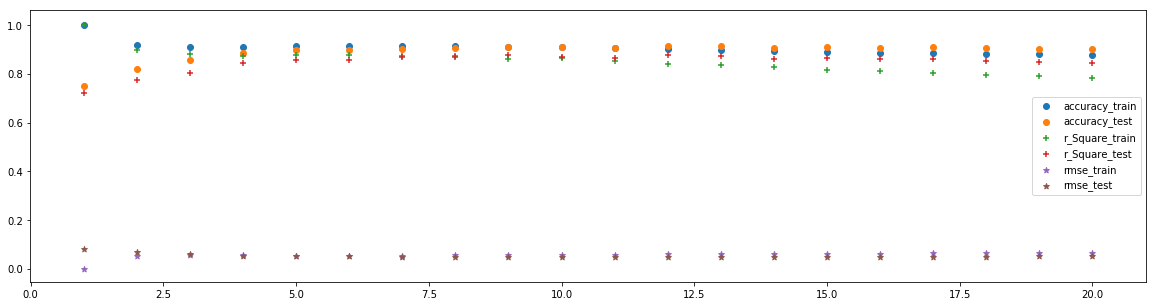

In [53]:
plt.figure(figsize = (20,5))

plt.scatter(k_values, accuracy_train, label = 'accuracy_train')
plt.scatter(k_values, accuracy_test, label = 'accuracy_test')

plt.scatter(k_values, r_Square_train_values, label = 'r_Square_train',marker='+')
plt.scatter(k_values, r_Square_test_values, label = 'r_Square_test',marker='+')

plt.scatter(k_values, rmse_train_values, label = 'rmse_train',marker='*')
plt.scatter(k_values, rmse_test_values, label = 'rmse_test',marker='*')

plt.legend()
plt.show()
     

## Feature selection

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58]),
 <a list of 59 Text xticklabel objects>)

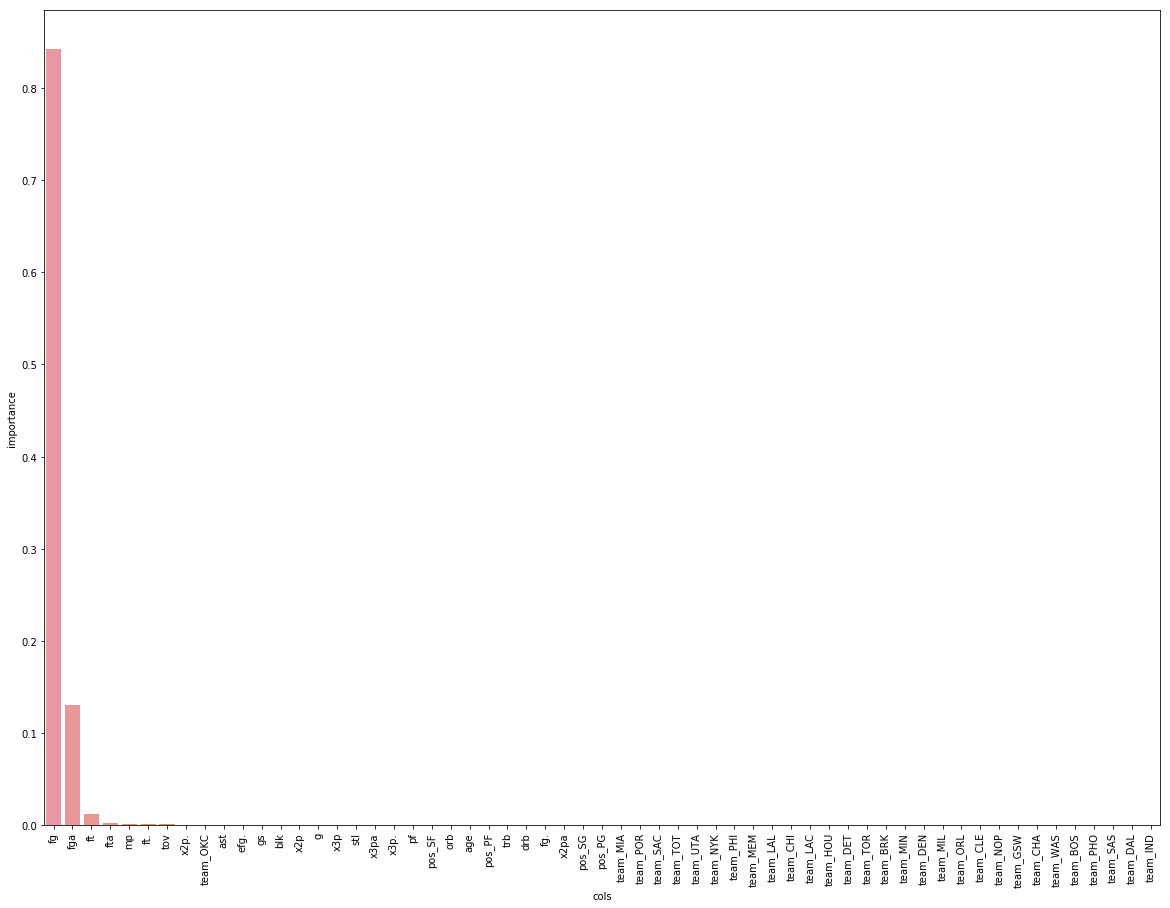

In [54]:
from sklearn.ensemble import RandomForestRegressor
rndf = RandomForestRegressor(n_estimators=150)
rndf.fit(x_train, y_train)
importance = pd.DataFrame.from_dict({'cols':x_train.columns, 'importance': rndf.feature_importances_})
importance = importance.sort_values(by='importance', ascending=False)
plt.figure(figsize=(20,15))
sns.barplot(importance.cols, importance.importance)
plt.xticks(rotation=90)

In [55]:
imp_cols = importance[importance.importance > 0.0005].cols.values
imp_cols

array(['fg', 'fga', 'ft', 'fta', 'mp', 'ft.', 'tov', 'x2p.', 'team_OKC',
       'ast', 'efg.', 'gs', 'blk'], dtype=object)

In [56]:
x1_train,x1_test, y1_train, y1_test = train_test_split(X[imp_cols],Y,test_size=0.2,random_state =100)

# Fit Features Selected Model and Collect the Metrics

## Distance Metric = Euclidean Distance

In [58]:
k_values =[]
r2_train1_values =[]
r2_test1_values =[]
rmse_train1_values = []
rmse_test1_values =[]
accuracy_test1 =[]
accuracy_train1 =[]


import math

for k in range(1,21):
    knn = KNeighborsRegressor(n_neighbors = k, weights='uniform', algorithm='auto')
    model = knn.fit(x1_train, y1_train) 
    y_pred1 = model.predict(x1_test)
    k_values.append(k)
    r2_train1_values.append(metrics.r2_score(model.predict(x1_train), y1_train))
    r2_test1_values.append(metrics.r2_score(model.predict(x1_test), y1_test))
    rmse_train1_values.append(math.sqrt(metrics.mean_squared_error(model.predict(x1_train), y1_train)))
    rmse_test1_values.append(math.sqrt(metrics.mean_squared_error(model.predict(x1_test), y1_test)))
    accuracy_train1.append(model.score(x1_train, y1_train))
    accuracy_test1.append(model.score(x1_test, y1_test))

    print("Accuracy: ", model.score(x1_test, y1_test),"for K-Value:",k)

Accuracy:  0.9472082494473167 for K-Value: 1
Accuracy:  0.9618453556830566 for K-Value: 2
Accuracy:  0.9656694992576822 for K-Value: 3
Accuracy:  0.9689009716294466 for K-Value: 4
Accuracy:  0.9680043290469977 for K-Value: 5
Accuracy:  0.9699346170194433 for K-Value: 6
Accuracy:  0.9740549229939546 for K-Value: 7
Accuracy:  0.9717924988056623 for K-Value: 8
Accuracy:  0.9711873245914094 for K-Value: 9
Accuracy:  0.9697589532543371 for K-Value: 10
Accuracy:  0.9705629419112501 for K-Value: 11
Accuracy:  0.969900511706657 for K-Value: 12
Accuracy:  0.969350939920821 for K-Value: 13
Accuracy:  0.9664692948167155 for K-Value: 14
Accuracy:  0.9669561827028833 for K-Value: 15
Accuracy:  0.9663191206841542 for K-Value: 16
Accuracy:  0.9671736890741885 for K-Value: 17
Accuracy:  0.9660438182650514 for K-Value: 18
Accuracy:  0.9654495768087406 for K-Value: 19
Accuracy:  0.9650454526676803 for K-Value: 20


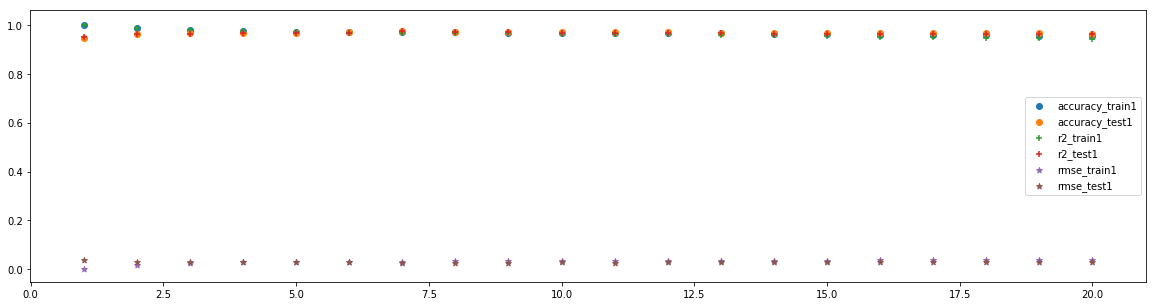

In [61]:
plt.figure(figsize = (20,5))

plt.scatter(k_values, accuracy_train1, label = 'accuracy_train1')
plt.scatter(k_values, accuracy_test1, label = 'accuracy_test1')

plt.scatter(k_values, r2_train1_values, label = 'r2_train1', marker='+')
plt.scatter(k_values, r2_test1_values, label = 'r2_test1', marker='+')

plt.scatter(k_values, rmse_train1_values, label = 'rmse_train1', marker='*')
plt.scatter(k_values, rmse_test1_values, label = 'rmse_test1', marker='*')

plt.legend()
plt.show()

# Validate Model

In [63]:
# Validate Base Model

cv_scores_euclid =[]
#cv_scores_manhattan =[]
#cv_scores_minkowski =[]

k_values =[]

for k in range(1, 21):
    
    k_values.append(k)
    
    knn_euclid = KNeighborsRegressor(n_neighbors = k, weights='uniform', algorithm='auto')
    scores = cross_val_score(knn_euclid, x_train, y_train, cv=10, scoring='neg_mean_squared_error')
    cv_scores_euclid.append(scores.mean())
    
    #knn_manhattan = KNeighborsRegressor(n_neighbors = k, weights='uniform', algorithm='auto', p = 1 )
    #scores = cross_val_score(knn_manhattan, x_train, y_train, cv=10, scoring='neg_mean_squared_error')
    #cv_scores_manhattan.append(scores.mean())
    
    #knn_minkowski = KNeighborsRegressor(n_neighbors = k, weights='uniform', algorithm='auto', p = 3)
    #scores = cross_val_score(knn_minkowski, x_train, y_train, cv=10, scoring='neg_mean_squared_error')
    #cv_scores_minkowski.append(scores.mean())
 

***The CV score are better for feature selected models***

# Compare Performance Metrics of Different Models  - Euclidean Distance based Models 

In [64]:
# Base Model

k_values =[]
r2_train_values =[]
r2_test_values =[]
rmse_train_values = []
rmse_test_values =[]
accuracy_test =[]
accuracy_train =[]

import math

for k in range(1,21):
    knn = KNeighborsRegressor(n_neighbors = k, weights='uniform', algorithm='auto')
    model = knn.fit(x_train, y_train) 
    y_pred = model.predict(x_test)
    k_values.append(k)
    r2_train_values.append(metrics.r2_score(model.predict(x_train), y_train))
    r2_test_values.append(metrics.r2_score(model.predict(x_test), y_test))
    rmse_train_values.append(math.sqrt(metrics.mean_squared_error(model.predict(x_train), y_train)))
    rmse_test_values.append(math.sqrt(metrics.mean_squared_error(model.predict(x_test), y_test)))
    accuracy_train.append(model.score(x_train, y_train))
    accuracy_test.append(model.score(x_test, y_test))

In [67]:
# Features Selected Model

k_values =[]
r2_train1_values =[]
r2_test1_values =[]
rmse_train1_values = []
rmse_test1_values =[]
accuracy_test1 =[]
accuracy_train1 =[]


import math

for k in range(1,21):
    knn = KNeighborsRegressor(n_neighbors = k, weights='uniform', algorithm='auto')
    model = knn.fit(x1_train, y1_train) 
    y_pred1 = model.predict(x1_test)
    k_values.append(k)
    r2_train1_values.append(metrics.r2_score(model.predict(x1_train), y1_train))
    r2_test1_values.append(metrics.r2_score(model.predict(x1_test), y1_test))
    rmse_train1_values.append(math.sqrt(metrics.mean_squared_error(model.predict(x1_train), y1_train)))
    rmse_test1_values.append(math.sqrt(metrics.mean_squared_error(model.predict(x1_test), y1_test)))
    accuracy_train1.append(model.score(x1_train, y1_train))
    accuracy_test1.append(model.score(x1_test, y1_test))


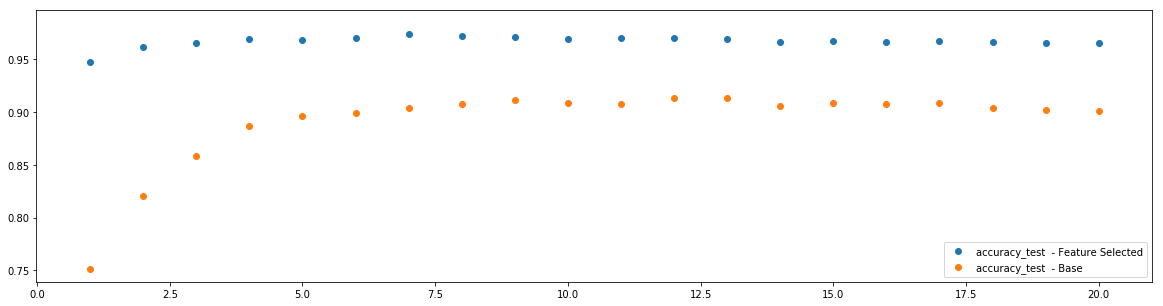

In [73]:
plt.figure(figsize = (20,5))

plt.scatter(k_values, accuracy_test1, label = 'accuracy_test  - Feature Selected')
plt.scatter(k_values, accuracy_test , label = 'accuracy_test  - Base')

plt.legend()
plt.show()

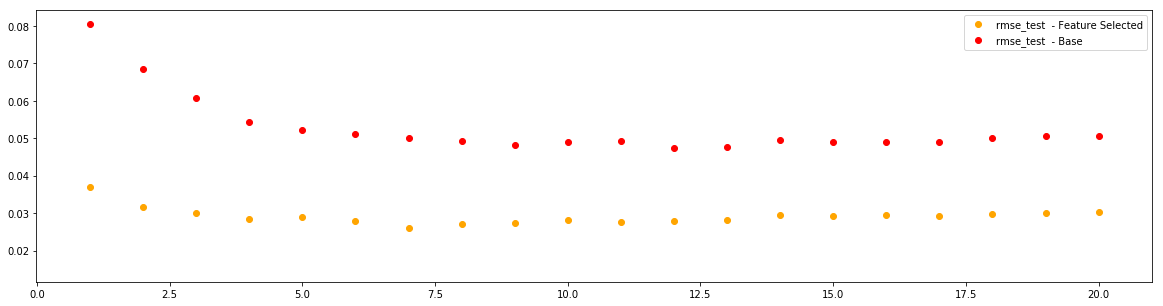

In [76]:
plt.figure(figsize = (20,5))

plt.scatter(k_values, rmse_test1_values, c ='orange', label = 'rmse_test  - Feature Selected')
plt.scatter(k_values, rmse_test_values,  c ='red', label = 'rmse_test  - Base')

plt.legend()
plt.show()

***Models with k = 4,6 provide us with better metrics so we choose to them***

In [78]:
knn_7 = KNeighborsRegressor(n_neighbors = 7, weights='uniform', algorithm='auto')
model_7 = knn_7.fit(x1_train, y1_train) 
print('K = 6')
print('-'*40)
print('Accuracy: ', model_7.score(x1_test, y1_test))
print('R2-score: ', metrics.r2_score(model_7.predict(x1_test), y1_test))
print('RMSE: ', math.sqrt(metrics.mean_squared_error(model_7.predict(x1_test), y1_test)))


K = 6
----------------------------------------
Accuracy:  0.9740549229939546
R2-score:  0.9736103716247438
RMSE:  0.026028315174290915


***The feature selected model (for k = 7 performs better for better than the base model. So this should be the model we choose to deploy***

# Choose the model for deployment

***Therefore the model we choose to deploy should have:***
    - k = 7,
    - test size = 0.2 or 20% of dataset and random_state = 100
    - training features = [ 'fg', 'fga', 'ft', 'fta', 'mp', 'ft.', 'tov', 'x2p.', 'team_OKC','ast', 'efg.', 'gs', 'blk']
    - Distance Metric = Euclidean Distance

In [79]:
knn_7

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=7, p=2,
          weights='uniform')